In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
import pickle
from sklearn.decomposition import PCA

In [5]:
## Loading the dataset.
df=pd.read_csv("dataset.csv")
df.head(10)


,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0
5,5,29.0,Male,45963.0,Married,1.0,Bachelor's,NaN,33.053198,Urban,...,2.0,4.0,614.0,5.0,2022-05-20 15:21:39.207847,Average,No,Weekly,House,3202.0
6,6,41.0,Male,40336.0,Married,0.0,PhD,NaN,NaN,Rural,...,2.0,8.0,807.0,6.0,2020-02-21 15:21:39.219432,Poor,No,Weekly,House,439.0
7,7,48.0,Female,127237.0,Divorced,2.0,High School,Employed,5.769783,Suburban,...,1.0,11.0,398.0,5.0,2022-08-08 15:21:39.181605,Average,No,Rarely,Condo,111.0
8,8,21.0,Male,1733.0,Divorced,3.0,Bachelor's,NaN,17.869551,Urban,...,1.0,10.0,685.0,8.0,2020-12-14 15:21:39.198406,Average,No,Monthly,Condo,213.0
9,9,44.0,Male,52447.0,Married,2.0,Master's,Employed,20.473718,Urban,...,1.0,9.0,635.0,3.0,2020-08-02 15:21:39.144722,Poor,No,Daily,Condo,64.0


In [6]:
## Droping the columns which isn't that important.
df=df.drop(['id','Age','Gender','Exercise Frequency','Marital Status','Policy Start Date'],axis=1)

# In total we have a lot of data so rather the  filling out NAN values with mean, Median and mode, we can just directly dropping the all NAN rows.

In [7]:
df=df.dropna(axis=0)

In [8]:
df.isnull().sum()

Annual Income           0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Customer Feedback       0
Smoking Status          0
Property Type           0
Premium Amount          0
dtype: int64

In [9]:
df.shape

(396266, 15)

In [10]:
df = df.iloc[:50000]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 0 to 151800
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Annual Income         50000 non-null  float64
 1   Number of Dependents  50000 non-null  float64
 2   Education Level       50000 non-null  object 
 3   Occupation            50000 non-null  object 
 4   Health Score          50000 non-null  float64
 5   Location              50000 non-null  object 
 6   Policy Type           50000 non-null  object 
 7   Previous Claims       50000 non-null  float64
 8   Vehicle Age           50000 non-null  float64
 9   Credit Score          50000 non-null  float64
 10  Insurance Duration    50000 non-null  float64
 11  Customer Feedback     50000 non-null  object 
 12  Smoking Status        50000 non-null  object 
 13  Property Type         50000 non-null  object 
 14  Premium Amount        50000 non-null  float64
dtypes: float64(8), object(7

In [12]:
for col in df.select_dtypes(include='O').columns:
    print('{}---> column value counts'.format(col))
    print(df[col].value_counts())
    print('----------------------------------')

Education Level---> column value counts
Education Level
Bachelor's     12714
PhD            12687
Master's       12558
High School    12041
Name: count, dtype: int64
----------------------------------
Occupation---> column value counts
Occupation
Self-Employed    16966
Employed         16783
Unemployed       16251
Name: count, dtype: int64
----------------------------------
Location---> column value counts
Location
Rural       16786
Urban       16621
Suburban    16593
Name: count, dtype: int64
----------------------------------
Policy Type---> column value counts
Policy Type
Premium          16821
Basic            16627
Comprehensive    16552
Name: count, dtype: int64
----------------------------------
Customer Feedback---> column value counts
Customer Feedback
Average    16771
Poor       16667
Good       16562
Name: count, dtype: int64
----------------------------------
Smoking Status---> column value counts
Smoking Status
Yes    25134
No     24866
Name: count, dtype: int64
----------

In [13]:
## Label Encoding:
le_feedback=LabelEncoder()
le_smoke=LabelEncoder()
df['Customer Feedback']=le_feedback.fit_transform(df['Customer Feedback'])
df['Smoking Status']=le_smoke.fit_transform(df['Smoking Status'])
df.head()


,Annual Income,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Property Type,Premium Amount
0,10049.0,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2,0,House,2869.0
4,39651.0,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2,1,House,2022.0
7,127237.0,2.0,High School,Employed,5.769783,Suburban,Comprehensive,1.0,11.0,398.0,5.0,0,0,Condo,111.0
9,52447.0,2.0,Master's,Employed,20.473718,Urban,Comprehensive,1.0,9.0,635.0,3.0,2,0,Condo,64.0
15,6076.0,2.0,High School,Employed,7.442964,Urban,Premium,1.0,12.0,584.0,5.0,1,1,Apartment,849.0


In [14]:
## One hot Encode the remaining categorical columns:
ohe_education=OneHotEncoder()
ohe_occupation=OneHotEncoder()
ohe_location=OneHotEncoder()
ohe_policy=OneHotEncoder()
ohe_property=OneHotEncoder()
education_encoder=ohe_education.fit_transform(df[['Education Level']]).toarray()
occupation_encoder=ohe_occupation.fit_transform(df[['Occupation']]).toarray()
location_encoder=ohe_location.fit_transform(df[['Location']]).toarray()
policy_encoder=ohe_policy.fit_transform(df[['Policy Type']]).toarray()
property_encoder=ohe_property.fit_transform(df[['Property Type']]).toarray()


In [15]:
## Creating datdframes of onehotencoded columns:
education_encoded_df=pd.DataFrame(education_encoder,columns=ohe_education.get_feature_names_out(['Education Level']))
occupation_encoded_df=pd.DataFrame(occupation_encoder,columns=ohe_occupation.get_feature_names_out(['Occupation']))
location_encoded_df=pd.DataFrame(location_encoder,columns=ohe_location.get_feature_names_out(['Location']))
policy_encoded_df=pd.DataFrame(policy_encoder,columns=ohe_policy.get_feature_names_out(['Policy Type']))
property_encoded_df=pd.DataFrame(property_encoder,columns=ohe_property.get_feature_names_out(['Property Type']))

df_encoded=pd.concat([education_encoded_df.reset_index(drop=True)
                      ,occupation_encoded_df.reset_index(drop=True),
                      location_encoded_df.reset_index(drop=True),policy_encoded_df.reset_index(drop=True),
                      property_encoded_df.reset_index(drop=True)],axis=1)

df_encoded.isnull().sum()

Education Level_Bachelor's     0
Education Level_High School    0
Education Level_Master's       0
Education Level_PhD            0
Occupation_Employed            0
Occupation_Self-Employed       0
Occupation_Unemployed          0
Location_Rural                 0
Location_Suburban              0
Location_Urban                 0
Policy Type_Basic              0
Policy Type_Comprehensive      0
Policy Type_Premium            0
Property Type_Apartment        0
Property Type_Condo            0
Property Type_House            0
dtype: int64

In [16]:
## Combine one hot encoder columns with the original data
data=pd.concat([df.drop(['Education Level','Occupation','Location','Policy Type','Property Type'],axis=1).reset_index(drop=True),df_encoded],axis=1)
data.isnull().sum()

Annual Income                  0
Number of Dependents           0
Health Score                   0
Previous Claims                0
Vehicle Age                    0
Credit Score                   0
Insurance Duration             0
Customer Feedback              0
Smoking Status                 0
Premium Amount                 0
Education Level_Bachelor's     0
Education Level_High School    0
Education Level_Master's       0
Education Level_PhD            0
Occupation_Employed            0
Occupation_Self-Employed       0
Occupation_Unemployed          0
Location_Rural                 0
Location_Suburban              0
Location_Urban                 0
Policy Type_Basic              0
Policy Type_Comprehensive      0
Policy Type_Premium            0
Property Type_Apartment        0
Property Type_Condo            0
Property Type_House            0
dtype: int64

In [17]:
##Lets save the cleaned data set into a new csv
data.to_csv('Encoded_Data.csv',index=False)

PermissionError: [Errno 13] Permission denied: 'Encoded_Data.csv'

## PCA Analysis

In [18]:
numerical_columns=[col for col in data.columns if col not in df_encoded.columns]
numerical_columns.remove('Customer Feedback')
numerical_columns.remove('Smoking Status')
numerical_columns.remove('Premium Amount')
numerical_columns

['Annual Income',
 'Number of Dependents',
 'Health Score',
 'Previous Claims',
 'Vehicle Age',
 'Credit Score',
 'Insurance Duration']

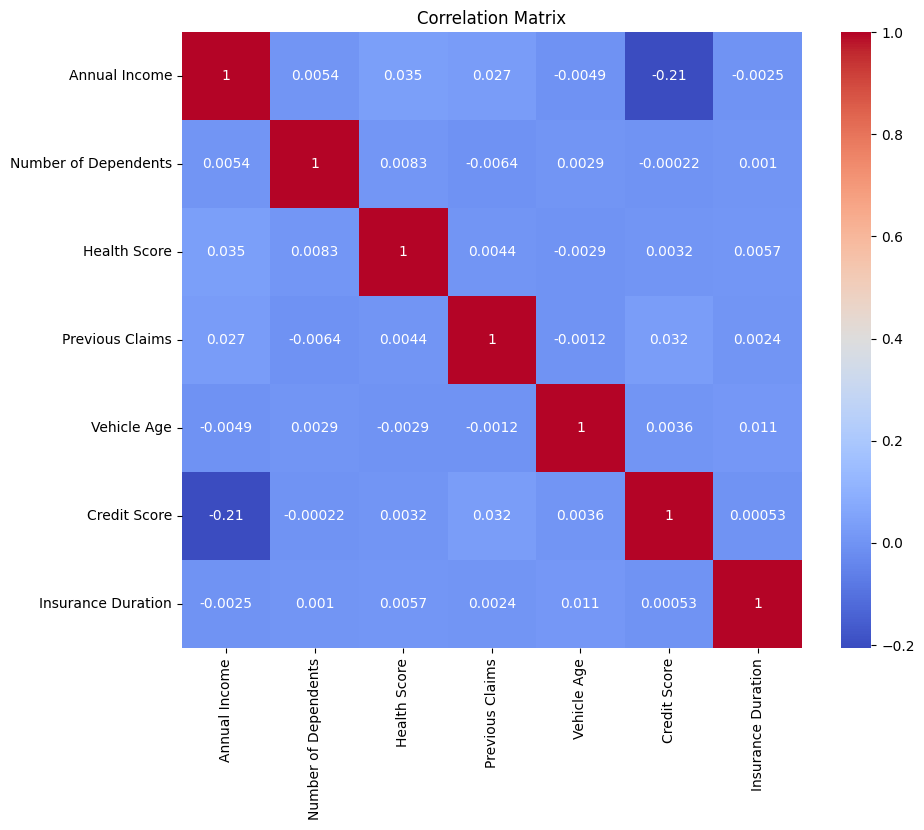

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [20]:
from sklearn.compose import ColumnTransformer

scaler=StandardScaler()

preprocessor=ColumnTransformer([("StandardScaler",scaler,numerical_columns)])

data_scaled=preprocessor.fit_transform(data[numerical_columns])
data_scaled=pd.DataFrame(data_scaled,columns=numerical_columns)


In [21]:
## Apply the PCA
pca=PCA(n_components=3)
pca_scaled=pca.fit_transform(data_scaled)
data_pca=pd.DataFrame(pca_scaled,columns=['pca_feature1','pca_feature2','pca_feature3'])
df_new_after_pca=pd.concat([data_pca.reset_index(drop=True),
                            data[df_encoded.columns].reset_index(drop=True),
                            data['Smoking Status'].reset_index(drop=True),
                            data['Customer Feedback'].reset_index(drop=True),
                            data['Premium Amount'].reset_index(drop=True)],axis=1)

In [25]:
df_new_after_pca

,pca_feature1,pca_feature2,pca_feature3,Education Level_Bachelor's,Education Level_High School,Education Level_Master's,Education Level_PhD,Occupation_Employed,Occupation_Self-Employed,Occupation_Unemployed,...,Location_Urban,Policy Type_Basic,Policy Type_Comprehensive,Policy Type_Premium,Property Type_Apartment,Property Type_Condo,Property Type_House,Smoking Status,Customer Feedback,Premium Amount
0,0.437207,0.267738,-0.073992,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0,2,2869.0
1,0.086344,-1.174292,0.185208,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,2,2022.0
2,2.780860,-0.877642,-0.007974,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,111.0
3,0.191647,-0.456092,0.498221,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,2,64.0
4,-0.716251,-0.930496,-0.256969,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1,1,849.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-1.783450,-1.200903,0.855799,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,1157.0
49996,2.019272,0.496532,0.415900,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,2,3099.0
49997,-0.337996,-0.808977,-2.298795,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1,2082.0
49998,-1.001479,-0.416377,-0.004949,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,0,401.0


# Feature selection and Train-Test Split

In [26]:
X=df_new_after_pca.iloc[:, :-1]
y=df_new_after_pca['Premium Amount']

## Split the data in training and tetsing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


## ANN Implementation

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime

In [28]:
##Building ANN Model:
model=Sequential([
Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
Dense(32,activation='relu'),
Dense(1)   ##Output Layer without any Actiavtion Function as Problem is Regression
])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1408      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3521 (13.75 KB)
Trainable params: 3521 (13.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
##Compile the model:
model.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mae'])

In [31]:
## Setting up Tensor Board
log_dir="regressionlogs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback= TensorBoard(log_dir=log_dir,histogram_freq=1)

In [32]:
## Setting Up Early-Stopping:
early__stopping_callback= EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [33]:
## Model Traing:
history=model.fit(
X_train,y_train,validation_data=(X_test,y_test),
epochs=100,
callbacks=[early__stopping_callback,tensorboard_callback]
)

Epoch 1/100


1250/1250 [==============================] - 5s 3ms/step - loss: 714.6385 - mae: 714.6385 - val_loss: 657.7419 - val_mae: 657.7419
Epoch 2/100
1250/1250 [==============================] - 4s 3ms/step - loss: 642.7063 - mae: 642.7063 - val_loss: 656.4182 - val_mae: 656.4182
Epoch 3/100
1250/1250 [==============================] - 4s 3ms/step - loss: 642.1240 - mae: 642.1240 - val_loss: 656.8018 - val_mae: 656.8018
Epoch 4/100
1250/1250 [==============================] - 4s 3ms/step - loss: 641.9963 - mae: 641.9963 - val_loss: 656.5154 - val_mae: 656.5154
Epoch 5/100
1250/1250 [==============================] - 4s 3ms/step - loss: 642.1467 - mae: 642.1467 - val_loss: 656.2907 - val_mae: 656.2907
Epoch 6/100
1250/1250 [==============================] - 4s 3ms/step - loss: 642.0278 - mae: 642.0278 - val_loss: 656.1848 - val_mae: 656.1848
Epoch 7/100
1250/1250 [==============================] - 4s 3ms/step - loss: 642.0519 - mae: 642.0519 - val_loss: 656.2996 - val_mae: 656.29

In [34]:
%load_ext tensorboard

In [36]:
%tensorboard --logdir regressionlogs/fit

Reusing TensorBoard on port 6006 (pid 33500), started 21:55:25 ago. (Use '!kill 33500' to kill it.)

## Without using PCA:

In [37]:
##Loading DataFrame.
df_new_before_pca=pd.read_csv('Encoded_Data.csv')
df_new_before_pca

,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Premium Amount,...,Occupation_Unemployed,Location_Rural,Location_Suburban,Location_Urban,Policy Type_Basic,Policy Type_Comprehensive,Policy Type_Premium,Property Type_Apartment,Property Type_Condo,Property Type_House
0,10049.0,1.0,22.598761,2.0,17.0,372.0,5.0,2,0,2869.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,39651.0,1.0,20.376094,0.0,8.0,598.0,4.0,2,1,2022.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,127237.0,2.0,5.769783,1.0,11.0,398.0,5.0,0,0,111.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,52447.0,2.0,20.473718,1.0,9.0,635.0,3.0,2,0,64.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,6076.0,2.0,7.442964,1.0,12.0,584.0,5.0,1,1,849.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,5837.0,1.0,16.876391,0.0,0.0,842.0,5.0,0,1,1157.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
49996,65445.0,2.0,24.564911,2.0,8.0,308.0,6.0,2,0,3099.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
49997,5525.0,4.0,15.173336,0.0,19.0,517.0,6.0,1,0,2082.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
49998,8783.0,3.0,24.522925,1.0,14.0,694.0,1.0,0,1,401.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [38]:
X1=df_new_before_pca.drop('Premium Amount',axis=1)
y1=df_new_before_pca['Premium Amount']

## Split the data in training and tetsing sets
X_train_new,X_test_new,y_train_new,y_test_new=train_test_split(X1,y1,test_size=0.2,random_state=42)

In [39]:
## Implementing ANN.
model_new=Sequential([
Dense(64,activation='relu',input_shape=(X_train_new.shape[1],)),
Dense(32,activation='relu'),
Dense(1)   ##Output Layer without any Actiavtion Function as Problem is Regression
])

In [40]:
model_new.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                1664      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3777 (14.75 KB)
Trainable params: 3777 (14.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
## Compiling the model.
model_new.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mae'])

In [42]:
## Setting up Tensor Board
log_dir="regressionlogs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback= TensorBoard(log_dir=log_dir,histogram_freq=1)

In [43]:
## Setting Up Early-Stopping:
early__stopping_callback= EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [45]:
## Model Traing:
history=model.fit(
X_train,y_train,validation_data=(X_test_new,y_test_new),
epochs=100,
callbacks=[early__stopping_callback,tensorboard_callback]
)

Epoch 1/100
1244/1250 [============================>.] - ETA: 0s - loss: 641.9778 - mae: 641.9778

InvalidArgumentError: Graph execution error:

Detected at node sequential/dense/Relu defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "t:\Insurance Premium\venv\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "t:\Insurance Premium\venv\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "t:\Insurance Premium\venv\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "t:\Insurance Premium\venv\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "t:\Insurance Premium\venv\Lib\asyncio\base_events.py", line 604, in run_forever

  File "t:\Insurance Premium\venv\Lib\asyncio\base_events.py", line 1909, in _run_once

  File "t:\Insurance Premium\venv\Lib\asyncio\events.py", line 80, in _run

  File "t:\Insurance Premium\venv\Lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "t:\Insurance Premium\venv\Lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "t:\Insurance Premium\venv\Lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "t:\Insurance Premium\venv\Lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "t:\Insurance Premium\venv\Lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "t:\Insurance Premium\venv\Lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "t:\Insurance Premium\venv\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "t:\Insurance Premium\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "t:\Insurance Premium\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "t:\Insurance Premium\venv\Lib\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner

  File "t:\Insurance Premium\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "t:\Insurance Premium\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "t:\Insurance Premium\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\asus\AppData\Local\Temp\ipykernel_33232\2108704126.py", line 2, in <module>

  File "t:\Insurance Premium\venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "t:\Insurance Premium\venv\Lib\site-packages\keras\src\engine\training.py", line 1856, in fit

  File "t:\Insurance Premium\venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "t:\Insurance Premium\venv\Lib\site-packages\keras\src\engine\training.py", line 2296, in evaluate

  File "t:\Insurance Premium\venv\Lib\site-packages\keras\src\engine\training.py", line 4108, in run_step

  File "t:\Insurance Premium\venv\Lib\site-packages\keras\src\engine\training.py", line 2066, in test_function

  File "t:\Insurance Premium\venv\Lib\site-packages\keras\src\engine\training.py", line 2049, in step_function

  File "t:\Insurance Premium\venv\Lib\site-packages\keras\src\engine\training.py", line 2037, in run_step

  File "t:\Insurance Premium\venv\Lib\site-packages\keras\src\engine\training.py", line 1917, in test_step

  File "t:\Insurance Premium\venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "t:\Insurance Premium\venv\Lib\site-packages\keras\src\engine\training.py", line 590, in __call__

  File "t:\Insurance Premium\venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "t:\Insurance Premium\venv\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "t:\Insurance Premium\venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "t:\Insurance Premium\venv\Lib\site-packages\keras\src\engine\sequential.py", line 398, in call

  File "t:\Insurance Premium\venv\Lib\site-packages\keras\src\engine\functional.py", line 515, in call

  File "t:\Insurance Premium\venv\Lib\site-packages\keras\src\engine\functional.py", line 672, in _run_internal_graph

  File "t:\Insurance Premium\venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "t:\Insurance Premium\venv\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "t:\Insurance Premium\venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "t:\Insurance Premium\venv\Lib\site-packages\keras\src\layers\core\dense.py", line 255, in call

  File "t:\Insurance Premium\venv\Lib\site-packages\keras\src\activations.py", line 306, in relu

  File "t:\Insurance Premium\venv\Lib\site-packages\keras\src\backend.py", line 5395, in relu

Matrix size-incompatible: In[0]: [32,25], In[1]: [21,64]
	 [[{{node sequential/dense/Relu}}]] [Op:__inference_test_function_210066]

In [46]:
%load_ext tensorboard


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [47]:
%tensorboard --logdir regressionlogs/fit

Reusing TensorBoard on port 6006 (pid 33500), started 21:56:44 ago. (Use '!kill 33500' to kill it.)

## Traing dataset after PCA analysis is showing better results with minimum loss=641 achieved in 20 epochs. 

-Performing hyperparameter tunning on our intial model to improve its score.

In [48]:
##Lets save the data afetr pca analysis into a new csv
df_new_after_pca.to_csv('Dataset_After_PCA.csv',index=False)

PermissionError: [Errno 13] Permission denied: 'Dataset_After_PCA.csv'

## Code used to hyperparameter tune the model.

In [ ]:
# !pip install scikeras
# !pip uninstall scikit-learn -y
# !pip install scikit-learn==1.2.2 # Downgrade scikit-learn to 1.2.2

# import pandas as pd
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
# from sklearn.pipeline import Pipeline
# from scikeras.wrappers import KerasRegressor
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.callbacks import EarlyStopping
# import pickle

# data=pd.read_csv('Dataset_After_PCA.csv')
# import numpy as np

# X=data.iloc[:, :-1]
# y=data['Premium Amount']

# ## Split the data in training and tetsing sets
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# # Define the model creation function
# def create_model(neuron=32, Layers=1):
#     model = Sequential()
#     model.add(Dense(neuron, activation='relu', input_shape=(X_train.shape[1],)))
#     for _ in range(Layers - 1):
#         model.add(Dense(neuron, activation='relu'))
#     model.add(Dense(1))
#     model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])
#     return model

# # Wrap with KerasRegressor
# # Remove model__neuron and model__layers from KerasRegressor initialization
# model_hptunned = KerasRegressor(build_fn=create_model, verbose=1) 



# # Parameter Grid
# # Update param_grid keys to match function arguments
# param_grid = {
#     "model__neuron": [16,32,64,128],
#     "model__Layers": [1, 2,3],
#     "epochs": [20,50,100]
# }

# # Grid Search
# grid = GridSearchCV(estimator=model_hptunned, param_grid=param_grid, cv=3, verbose=1)
# grid_result = grid.fit(X_train, y_train)

# # Best Results
# print(f"Best Score: {grid_result.best_score_}")
# print(f"Best Params: {grid_result.best_params_}")

Best params after tuning :  {'epochs': 50, 'model__Layers': 3, 'model__neuron': 128}

In [259]:
# Define the model creation function
def create_model(neuron=32, layers=1):
    model = Sequential()
    model.add(Dense(neuron, activation='relu', input_shape=(X_train.shape[1],)))
    for _ in range(layers - 1):
        model.add(Dense(neuron, activation='relu'))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])
    return model

In [260]:
## Setting up Tensor Board  for final model.
log_dir="regressionlogs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback= TensorBoard(log_dir=log_dir,histogram_freq=1)

In [261]:
## Setting Up Early-Stopping for final model:
early__stopping_callback= EarlyStopping(monitor='val_loss',patience=40,restore_best_weights=True)

In [262]:
# Final model creation:
final_model = create_model(neuron=128, layers=3)

# Train the model with the best hyperparameters
final_model.fit(X_train, y_train, epochs=50, verbose=1, validation_data=(X_test, y_test),callbacks=[early__stopping_callback,tensorboard_callback])

Epoch 1/50
1250/1250 [==============================] - 5s 3ms/step - loss: 703.4858 - mae: 703.4858 - val_loss: 694.6538 - val_mae: 694.6538
Epoch 2/50
1250/1250 [==============================] - 4s 3ms/step - loss: 679.4124 - mae: 679.4124 - val_loss: 712.5715 - val_mae: 712.5715
Epoch 3/50
1250/1250 [==============================] - 4s 3ms/step - loss: 677.1107 - mae: 677.1107 - val_loss: 683.0735 - val_mae: 683.0735
Epoch 4/50
1250/1250 [==============================] - 4s 3ms/step - loss: 674.1795 - mae: 674.1795 - val_loss: 682.7098 - val_mae: 682.7098
Epoch 5/50
1250/1250 [==============================] - 4s 3ms/step - loss: 672.1520 - mae: 672.1520 - val_loss: 691.7689 - val_mae: 691.7689
Epoch 6/50
1250/1250 [==============================] - 4s 3ms/step - loss: 670.3442 - mae: 670.3442 - val_loss: 680.1331 - val_mae: 680.1331
Epoch 7/50
1250/1250 [==============================] - 4s 3ms/step - loss: 670.2484 - mae: 670.2484 - val_loss: 683.1613 - val_mae: 683.1613
Epoch 

In [263]:
%tensorboard --logdir regressionlogs/fit

Reusing TensorBoard on port 6006 (pid 33500), started 17:29:31 ago. (Use '!kill 33500' to kill it.)

In [264]:
final_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               3328      
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 128)               16512     
                                                                 
 dense_12 (Dense)            (None, 1)                 129       
                                                                 
Total params: 36481 (142.50 KB)
Trainable params: 36481 (142.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Pickle up the files for prediction:

Encoders, 
StandardScaler, 
PCA Model, 
Final ANN Model


In [49]:
## Save the encoders and sscaler
with open('le_feedback.pkl','wb') as file:
    pickle.dump(le_feedback,file)

with open('le_smoke.pkl','wb') as file:
    pickle.dump(le_smoke,file)

with open('ohe_education.pkl','wb') as file:
    pickle.dump(ohe_education,file)

with open('ohe_occupation.pkl','wb') as file:
    pickle.dump(ohe_occupation,file)

with open('ohe_location.pkl','wb') as file:
    pickle.dump(ohe_location,file)

with open('ohe_property.pkl','wb') as file:
    pickle.dump(ohe_property,file)

with open('ohe_policy.pkl','wb') as file:
    pickle.dump(ohe_policy,file)
    
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

with open('pca.pkl','wb') as file:
    pickle.dump(pca,file)

with open("preprocessor.pkl", "wb") as file:
    pickle.dump(preprocessor, file)



model.save('model.h5')

t:\Insurance Premium\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
